In [92]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/andrew/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 1.2 Control policies and open-loop control

## 1.

In [93]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [94]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control Policy for elipse

In [95]:
def controlElipse(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    
    ux = (2 * cos(t) * cos(-30)) - (1 * sin(t) * sin(-30))
    uy = (2 * cos(t) * sin(-30)) + (1 * sin(t) * cos(-30))
    
    return array([ux, uy])

### Control policy for elipse

The way I obtained the control policies were to first get the basic parametric equation for an elipse and then transform the equation to do a rotation

In [96]:
tf = 10.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([4., 2.])
elipse_x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = controlElipse(t, y)    
    x = simulate(Δt, x, u)
    elipse_x_log.append(copy(x))
    
elipse_x_log = array(elipse_x_log)

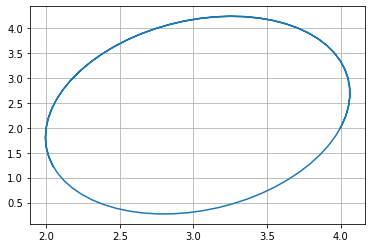

In [97]:
grid()
plot(elipse_x_log[:,0], elipse_x_log[:,1])

## 2.

### Control Policy for elipse figure eight

The way I obtained the control policy was to look for an equation that produced a figure eight curve. The Lemniscate Of Gerono was able to produce a figure eight

In [98]:
def controlElipseFigureEight(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    alpha = 1

    ux = alpha * np.sqrt(2) * np.cos(t) / (np.sin(t)**2 + 1)
    uy = alpha * np.sqrt(2) * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)
    
    return array([ux, uy])

### Running the simulator

In [114]:
tf = 1000.
Δt = 0.1    # Time step
# time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval
time = np.linspace(0, 2*np.pi, num=1000)

# Initial conditions
x = array([2., 1.])
figure_eight_x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = controlElipseFigureEight(t, y)    
    x = simulate(Δt, x, u)
    figure_eight_x_log.append(copy(x))
    
figure_eight_x_log = array(figure_eight_x_log)

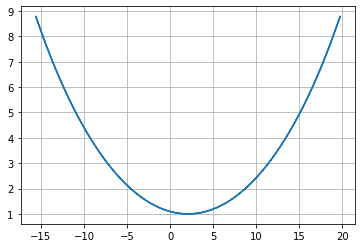

In [115]:
grid()
plot(figure_eight_x_log[:,0], figure_eight_x_log[:,1])

The graph should like this, not sure why previous code block does not work

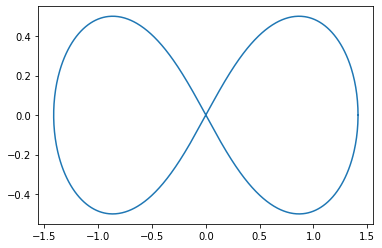

In [118]:
alpha = 1
t = np.linspace(0, 2*np.pi, num=1000)

eight_x = alpha * np.sqrt(2) * np.cos(t) / (np.sin(t)**2 + 1)
eight_y = alpha * np.sqrt(2) * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)

plt.plot(eight_x, eight_y)
plt.show()

## 3.

3D Trajectory for 1. and 2.

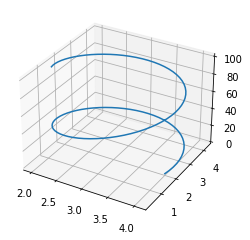

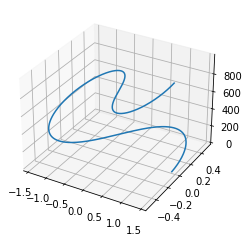

In [119]:

fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax2 = fig2.gca(projection='3d')
ax1.plot(elipse_x_log[:,0], elipse_x_log[:,1], range(len(elipse_x_log)), label='parametric curve')
ax2.plot(eight_x, eight_y, range(len(eight_x)))


# 1.3 Trajectories

## 1. and 2.

In [103]:
def point_to_point_traj(x1, x2, v1, v2, delta_t):
  t = np.linspace(0, delta_t, 100)  
  a0 = x1
  a1 = v1
  a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
  a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

  polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
  derivative = a1 + 2*a2 * t + 3 * a3 * t**2
  return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])

        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()

        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

In [104]:
# Plotting
def plot_points():
    plot(X,Y, '--')
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
# Speed
def plot_speed():
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plot(speed)

I was able to obtain the trajectories by determining all the waypoints that I needed to visit to not only loop around the blue rectangle but also avoid hitting any rectangles

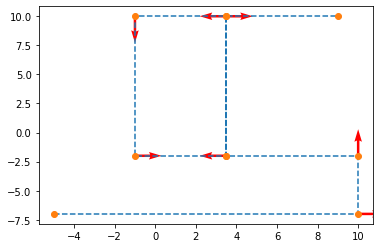

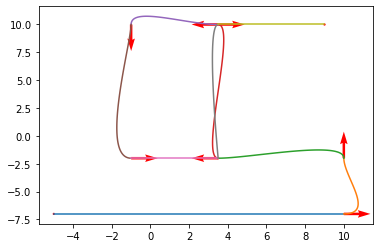

In [105]:
##### Requirements for the trajectory

# Waypoints
p1 = [-5.,-7.]
p2 = [10, -7]
p3 = [10,-2]
p4 = [3.5,-2]
p5 = [3.5,10]
p6 = [-1,10]
p7 = [-1,-2]
p8 = [3.5,-2]
p9 = [3.5,10]
p10 = [9,10]

# Velocities
v1 = [0.,0.]
v2 = [1,0]
v3 = [0,1]
v4 = [-1,0]
v5 = [-1,0]
v6 = [0,-1]
v7 = [1,0]
v8 = [0.0001,0]
v9 = [1,0]
v10 = [0,0]


# Time
t1 = 0
t2 = t1 + 3
t3 = t2 + 5
t4 = t3 + 5
t5 = t4 + 3
t6 = t5 + 5
t7 = t6 + 5
t8 = t7 + 2
t9 = t8 + 2
t10 = t9 + 2


# Grouping
P = np.vstack((p1, p2, p3, p4, p5, p6, p7, p8, p9, p10))
V = np.vstack((v1, v2, v3, v4, v5, v6, v7, v8, v9, v10))
T = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]

# Plotting
plot_points()
show()

# Piecewise function
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)

# Plotting
quiver(X,Y, Vx, Vy, color='r')  #

show()